In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# K-Means CLustering

In [2]:
rng1=np.random.RandomState(2)

In [3]:
centers=[]
centers = rng1.randn(5, 2)*4

In [4]:
data=[]
labels=[]

In [5]:
for i,center in enumerate(centers):
    pts=rng1.multivariate_normal(center,[[1,0],[0,1]], size=100)
    for point in pts:
        data.append(point)
        labels.append(i)
    

In [6]:
data=np.array(data)
labels=np.array(labels)

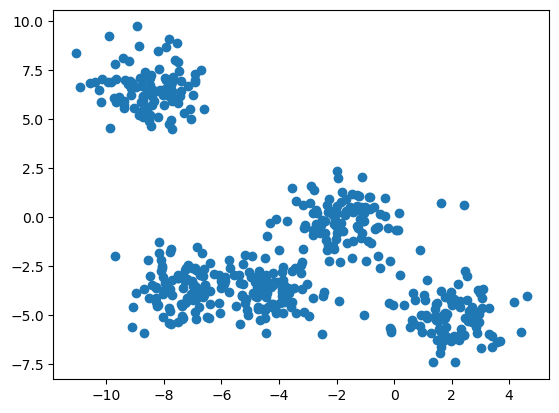

In [7]:
plt.scatter(data[:,0],data[:,1])

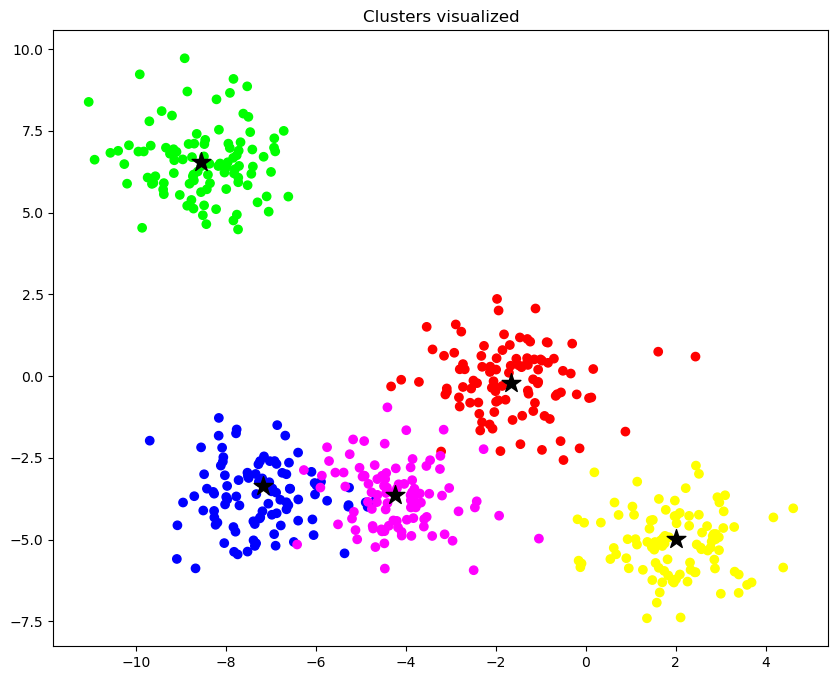

In [8]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF'])
plt.figure(figsize=(10,8))
plt.title('Clusters visualized')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*', s=200, label='Cluster centers')  # Add label to center points
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
wss_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)
    
    wss = kmeans.inertia_
    wss_scores.append(wss)

print("Silhouette Scores:", silhouette_scores)
print("WSS Scores:", wss_scores)

Silhouette Scores: [0.6139034340310427, 0.5596137248405318, 0.6466359238392313, 0.6195040452867074, 0.559122890570914, 0.4832644716273481, 0.45832463580970956, 0.3649329794291666, 0.3607181803160118]
WSS Scores: [6921.409568652667, 3276.297237816394, 1411.337810237755, 939.2691780523824, 880.4619994324072, 812.6322275264662, 750.8176635564882, 677.2292035436884, 644.5281850859567]


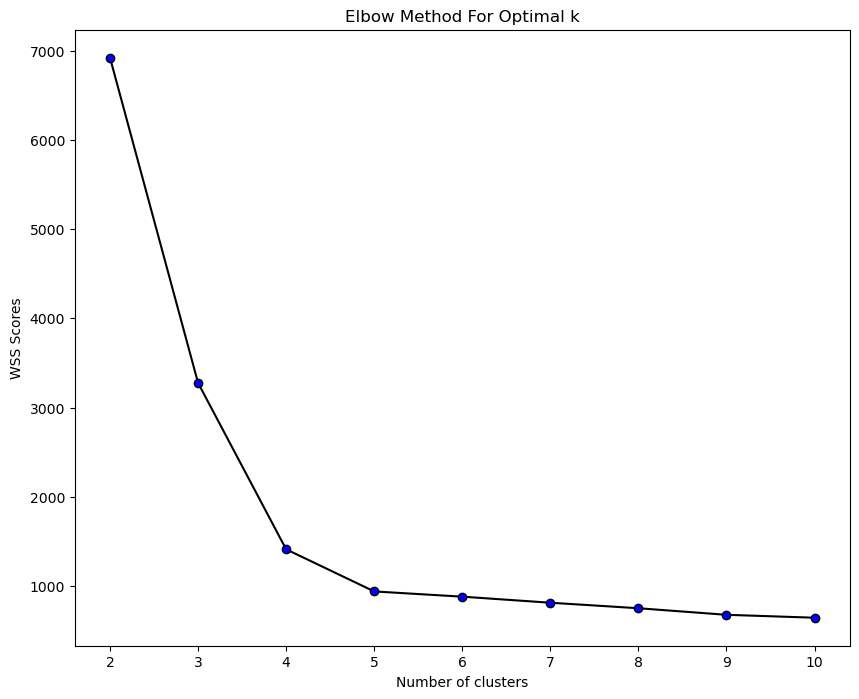

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), wss_scores, color='black', marker='o', markerfacecolor='blue')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WSS Scores')
plt.show()

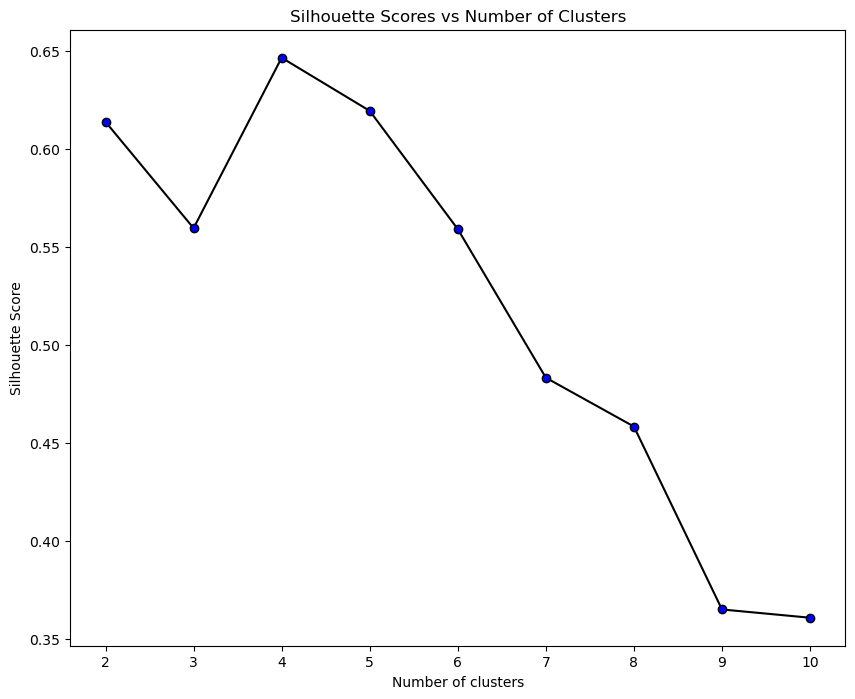

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, color='black', marker='o', markerfacecolor='blue')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

##
* Elbow method yeilds a value of K=5
* Silhouette method yeilds a value of K=4

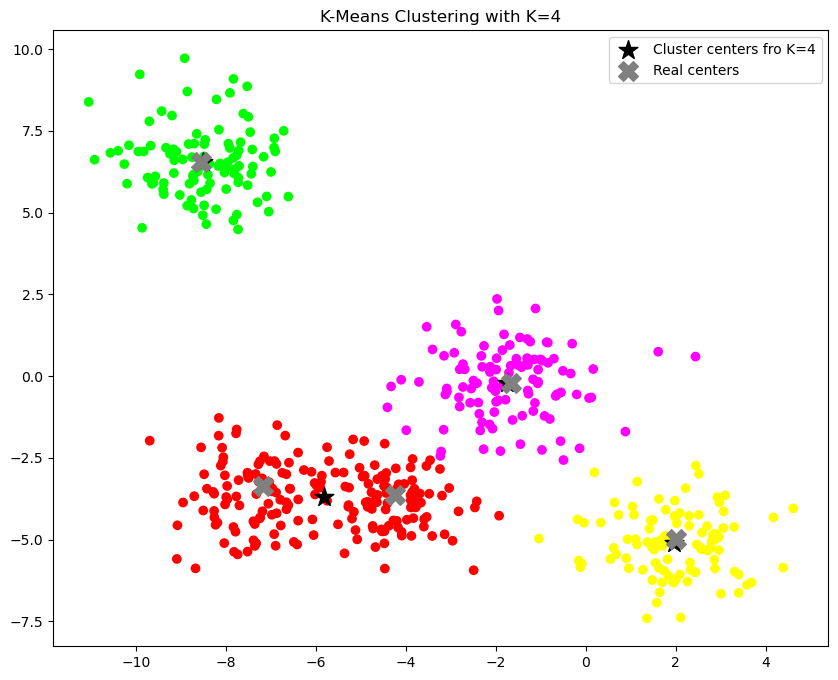

In [18]:
#Visualizing the clusters for K=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data)
labels = kmeans.labels_
plt.figure(figsize=(10, 8))
plt.title('K-Means Clustering with K=4')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='*', s=200, label='Cluster centers fro K=4')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', marker='X', s=200, label='Real centers')
plt.legend()
plt.show()

##
* We find that due to significant overlap between the two clusters silhoutee preferred to merge them.
* This is also a problem with K-Means that the approximate solutions depend on initializations.
* We should try to use K-Means with differrent starting values if possible.

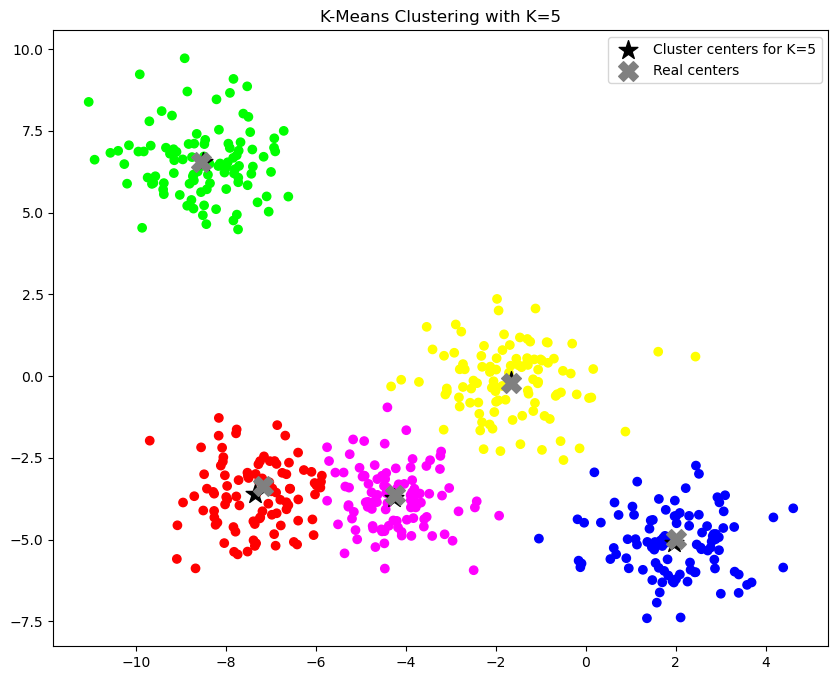

In [17]:
# Visualizing the clusters for K=5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)
labels = kmeans.labels_
plt.figure(figsize=(10, 8))
plt.title('K-Means Clustering with K=5')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='*', s=200, label='Cluster centers for K=5')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', marker='X', s=200, label='Real centers')
plt.legend()
plt.show()

## We see a good aggrement with the true cluster centers